## Queue

In [1]:
%load_ext nbtutor

In [2]:
class Queue:
    def __init__(self):
        self.items = []
        
    def enqueue(self, item):
        self.items.insert(0, item)
        
    def dequeue(self):
        if self.isEmpty():
            return None
        return self.items.pop()
        
    def isEmpty(self):
        return self.items == []
    
    def size(self):
        return len(self.items)

In [3]:
li = [1, 3]
li.insert(0, 9)

In [4]:
li

[9, 1, 3]

In [5]:
q=Queue()
q.enqueue(4)
q.enqueue('dog')
q.enqueue(True)
print(q.size())

3


In [6]:
q = Queue()
q.enqueue('hello')
q.enqueue('dog')
q.enqueue(3)
q.dequeue()
print(q.items)

[3, 'dog']


## Hot Potato

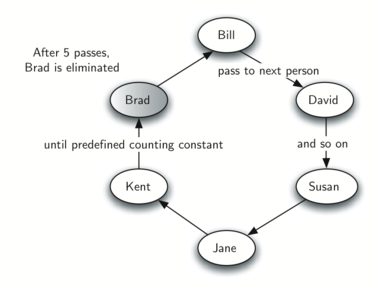

In [7]:
def hotPotato(namelist, num):
    q = Queue()
    for name in namelist:
        q.enqueue(name)
        
    while q.size() != 1:
        for i in range(num):
            q.enqueue(q.dequeue())
            
        q.dequeue()
            
    return q.dequeue()
        


In [8]:
hotPotato(["Bill","David","Susan","Jane","Kent","Brad"], 7)

'Susan'

In [9]:
%%nbtutor -r -f
class Queue:
    def __init__(self):
        self.items = []
        
    def enqueue(self, item):
        self.items.insert(0, item)
        
    def dequeue(self):
        if self.isEmpty():
            return None
        return self.items.pop()
        
    def isEmpty(self):
        return self.items == []
    
    def size(self):
        return len(self.items)
        
        
def hotPotato(namelist, num):
    q = Queue()
    for name in namelist:
        q.enqueue(name)
        
    count = 0
    while q.size() != 1:
        # print(q.items)
        if count != num:
            count += 1
            q.enqueue(q.dequeue())
        else:
            q.dequeue()
            count = 0  # count should be flushed here
            
    return q.dequeue()
        
hotPotato(["Bill","David","Susan","Jane","Kent","Brad"], 7)

## Simulation: Printing Tasks

In [11]:
import random

In [16]:
class Task:
    def __init__(self, time):
        self.timestamp = time
        self.pages = random.randrange(1, 21)
        
    def get_stamp(self):
        return self.timestamp
    
    def get_pages(self):
        return self.pages
    
    def wait_time(self, current_time):
        return current_time - self.timestamp

In [17]:
class Printer:
    def __init__(self, ppm):
        self.pagerate = ppm
        self.current_task = None
        self.time_remaining = 0
        
    def tick(self):
        if self.current_task != None:
            self.time_remaining -= 1
            if self.time_remaining < 0:
                self.current_task = None
                
    def busy(self):
        if self.current_task != None:
            return True
        else:
            return False
        
    def start_next(self, newtask):
        self.current_task = newtask
        self.time_remaining = newtask.get_pages() * 60 / self.pagerate

In [30]:
def new_print_task():
    num = random.randrange(1, 181)
    if num == 180:
        return True
    else:
        return False


def simulation(num_seconds, pages_per_minute):
    
    lab_printer = Printer(pages_per_minute)
    print_queue = Queue()
    waiting_times = []
    
    for current_second in range(num_seconds):
        if new_print_task():
            task = Task(current_second)
            print_queue.enqueue(task)
            
        if (not lab_printer.busy()) and (not print_queue.isEmpty()):
            next_task = print_queue.dequeue()
            waiting_times.append(next_task.wait_time(current_second))
            lab_printer.start_next(next_task)
            
        lab_printer.tick()
        
    average_wait = sum(waiting_times) / len(waiting_times)
    print("Average Wait %6.2f secs %3d tasks remaining."%(average_wait,print_queue.size()))
    
    
for i in range(10):
    simulation(3600, 5)

Average Wait 319.78 secs   4 tasks remaining.
Average Wait  98.47 secs   1 tasks remaining.
Average Wait 118.36 secs   0 tasks remaining.
Average Wait 163.69 secs   1 tasks remaining.
Average Wait  64.09 secs   0 tasks remaining.
Average Wait 115.25 secs   0 tasks remaining.
Average Wait 253.35 secs   0 tasks remaining.
Average Wait 166.38 secs   1 tasks remaining.
Average Wait  40.85 secs   0 tasks remaining.
Average Wait 110.68 secs   2 tasks remaining.


[Code from source](http://interactivepython.org/runestone/static/pythonds/BasicDS/SimulationPrintingTasks.html)

In [32]:
import random

class Printer:
    def __init__(self, ppm):
        self.pagerate = ppm
        self.currentTask = None
        self.timeRemaining = 0

    def tick(self):
        if self.currentTask != None:
            self.timeRemaining = self.timeRemaining - 1
            if self.timeRemaining <= 0:
                self.currentTask = None

    def busy(self):
        if self.currentTask != None:
            return True
        else:
            return False

    def startNext(self,newtask):
        self.currentTask = newtask
        self.timeRemaining = newtask.getPages() * 60/self.pagerate

class Task:
    def __init__(self,time):
        self.timestamp = time
        self.pages = random.randrange(1,21)

    def getStamp(self):
        return self.timestamp

    def getPages(self):
        return self.pages

    def waitTime(self, currenttime):
        return currenttime - self.timestamp


def simulation(numSeconds, pagesPerMinute):

    labprinter = Printer(pagesPerMinute)
    printQueue = Queue()
    waitingtimes = []

    for currentSecond in range(numSeconds):

      if newPrintTask():
         task = Task(currentSecond)
         printQueue.enqueue(task)

      if (not labprinter.busy()) and (not printQueue.isEmpty()):
        nexttask = printQueue.dequeue()
        waitingtimes.append( nexttask.waitTime(currentSecond))
        labprinter.startNext(nexttask)

      labprinter.tick()

    averageWait=sum(waitingtimes)/len(waitingtimes)
    print("Average Wait %6.2f secs %3d tasks remaining."%(averageWait,printQueue.size()))

def newPrintTask():
    num = random.randrange(1,181)
    if num == 180:
        return True
    else:
        return False

for i in range(10):
    simulation(3600,5)


Average Wait  53.00 secs   0 tasks remaining.
Average Wait 173.50 secs   0 tasks remaining.
Average Wait  21.24 secs   2 tasks remaining.
Average Wait 107.11 secs   0 tasks remaining.
Average Wait   4.00 secs   0 tasks remaining.
Average Wait  78.64 secs   0 tasks remaining.
Average Wait  27.46 secs   0 tasks remaining.
Average Wait 159.14 secs   5 tasks remaining.
Average Wait  97.50 secs   1 tasks remaining.
Average Wait  61.64 secs   0 tasks remaining.


## Deque

In [54]:
class Deque:
    def __init__(self):
        self.items = []
        
    def isEmpty(self):
        return self.items == []
    
    def size(self):
        return len(self.items)
    
    def addFront(self, item):
        self.items.append(item)
        
    def addRear(self, item):
        self.items.insert(0, item)
    
    def removeFront(self):
        return self.items.pop()
    
    def removeRear(self):
        return self.items.pop(0)

In [55]:
d = Deque()
d.isEmpty()
d.addRear(4)
d.addRear('dog')
d.addFront('cat')
d.addFront(True)
print(d.size())
print(d.isEmpty())
d.addRear(8.4)
d.removeRear()
d.removeFront()
print(d.items)

4
False
['dog', 4, 'cat']


## Palindrome-Checker

In [56]:
def palchecker(aString):
    deque = Deque()
    
    for each in aString:
        deque.addFront(each)
        
    while deque.size() > 1:
        if deque.removeFront() == deque.removeRear():
            continue
        else:
            return False
        
    return True

In [57]:
print(palchecker("lsdkjfskf"))
print(palchecker("radar"))

False
True
